In [116]:
from cnn.input import SpleenDataset, Dataloader
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [117]:
images_path = './Task09_Spleen_2D/imagesTr'
labels_path = './Task09_Spleen_2D/labelsTr'

In [118]:
images_filepaths = [os.path.join(images_path, filename) for filename in os.listdir(images_path)]
labels_filepaths = [os.path.join(labels_path, filename) for filename in os.listdir(labels_path)]

train_images_filepaths, val_images_filepaths, train_labels_filepaths, val_labels_filepaths = train_test_split(images_filepaths, labels_filepaths, test_size=0.33, random_state=0)

train_dataset = SpleenDataset(train_images_filepaths, train_labels_filepaths)
val_dataset = SpleenDataset(val_images_filepaths, val_labels_filepaths)

In [119]:
print(len(train_dataset))
print(len(val_dataset))

704
347


(256, 256)
(256, 256)


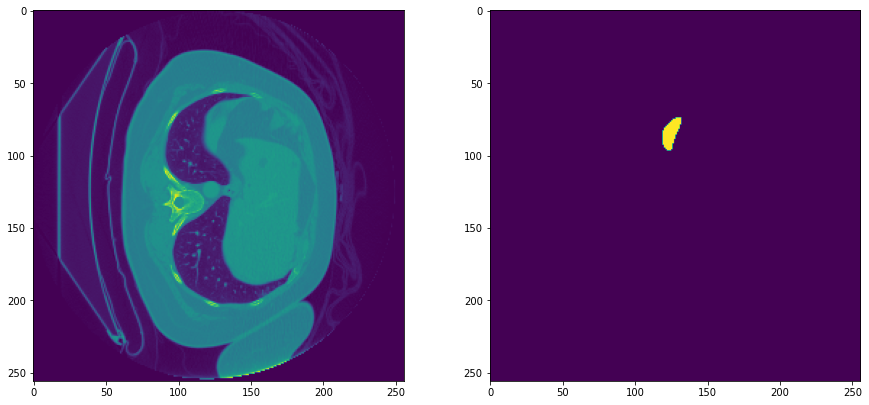

In [120]:
id = random.randint(0, len(train_dataset))
image, label = train_dataset[id]

print(image.shape)
print(label.shape)

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(label)

In [102]:
train_dataloader = Dataloader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = Dataloader(val_dataset, batch_size=1, shuffle=False)

In [103]:
print(len(train_dataloader))
print(len(val_dataloader))

22
347


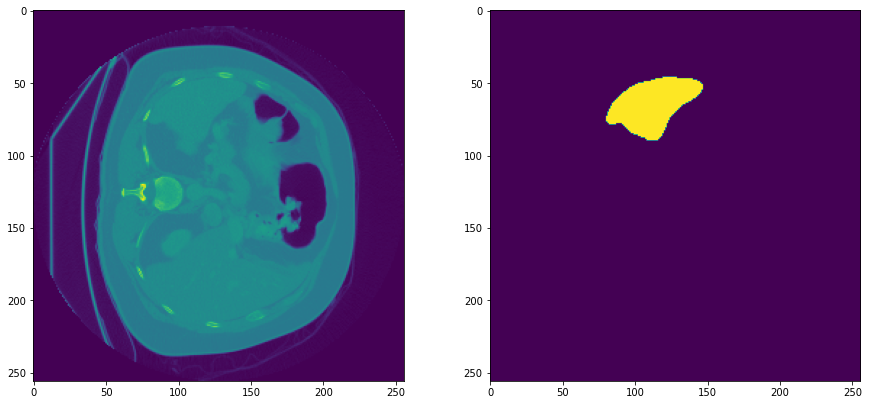

In [115]:
images, labels = next(iter(train_dataloader))

image = images[-1]
label = labels[-1]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(label)